Importação dos dados que estão presente em um repositório no Github no formato de arquivos .csv

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
cyl_00 = pd.read_csv('https://github.com/ascdavia/DeepLearning_SignalProcessing-sEMG/blob/main/Database/sEMG_Basic_Hand_movements_upatras/Database_1/df1_mov_cyl.csv?raw=true', compression=None)
hook_00 = pd.read_csv('https://github.com/ascdavia/DeepLearning_SignalProcessing-sEMG/blob/main/Database/sEMG_Basic_Hand_movements_upatras/Database_1/df1_mov_hook.csv?raw=true', compression=None)
lat_00 = pd.read_csv('https://github.com/ascdavia/DeepLearning_SignalProcessing-sEMG/blob/main/Database/sEMG_Basic_Hand_movements_upatras/Database_1/df1_mov_lat.csv?raw=true', compression=None)
palm_00 = pd.read_csv('https://github.com/ascdavia/DeepLearning_SignalProcessing-sEMG/blob/main/Database/sEMG_Basic_Hand_movements_upatras/Database_1/df1_mov_palm.csv?raw=true', compression=None)
spher_00 = pd.read_csv('https://github.com/ascdavia/DeepLearning_SignalProcessing-sEMG/blob/main/Database/sEMG_Basic_Hand_movements_upatras/Database_1/df1_mov_spher.csv?raw=true', compression=None)
tip_00 = pd.read_csv('https://github.com/ascdavia/DeepLearning_SignalProcessing-sEMG/blob/main/Database/sEMG_Basic_Hand_movements_upatras/Database_1/df1_mov_tip.csv?raw=true', compression=None)

In [ ]:
cyl_01 = cyl_00.drop(cyl_00.columns[0], axis=1)
hook_01 = hook_00.drop(hook_00.columns[0], axis=1)
lat_01 = lat_00.drop(lat_00.columns[0], axis=1)
palm_01 = palm_00.drop(palm_00.columns[0], axis=1)
spher_01 = spher_00.drop(spher_00.columns[0], axis=1)
tip_01 = tip_00.drop(tip_00.columns[0], axis=1)

In [ ]:
cyl = np.array_split(cyl_01, 100, axis=1)
hook = np.array_split(hook_01, 100, axis=1)
lat = np.array_split(lat_01, 100, axis=1)
palm = np.array_split(palm_01, 100, axis=1)
spher = np.array_split(spher_01, 100, axis=1)
tip = np.array_split(tip_01, 100, axis=1)

In [ ]:
def concatDf (df):
  aux_df = pd.DataFrame(columns = df[0].columns)

  for i in range (100):
  
    a = df[i].T.reset_index(drop=True).T
    aux_df = pd.concat([aux_df,a])

  aux_df_2 = aux_df.reset_index(drop=True)

  return aux_df_2

In [ ]:
cyl_DA = concatDf (cyl)
hook_DA = concatDf(hook)
lat_DA = concatDf(lat)
palm_DA = concatDf(palm)
spher_DA = concatDf(spher)
tip_DA = concatDf(tip)

Definição da matriz de entrada *x*

In [ ]:
x = pd.concat([cyl_DA,hook_DA,lat_DA,palm_DA,spher_DA,tip_DA], ignore_index=True)
x = x.dropna(axis=1)

In [ ]:
x = x.values.reshape(x.shape[0], x.shape[1], 1) #comando necessário para colocar a matriz de entrada x em um formato compatível com os neurônios de um CNN. Neste caso, foi necessário fazer uma camada de profundidade igual a 1.
print(x.shape)

(90000, 30, 1)


Definição da matriz de saída *y*

In [ ]:
base = np.ones((15000,1), dtype=np.int64)
mov_cyl = base*0
mov_hook = base*1
mov_lat = base*2
mov_palm = base*3
mov_spher = base*4
mov_tip = base*5

In [ ]:
mov = np.vstack([mov_cyl,mov_hook,mov_lat,mov_palm,mov_spher,mov_tip])
y = pd.DataFrame(mov)

Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)


CNN 1D - Modelo com 2 layers de convolução

In [ ]:
import keras
from keras.layers import Conv1D
from keras.layers import MaxPooling1D
from keras.layers import Dropout
from keras.layers import Dense
from keras.layers import GlobalAveragePooling1D
from keras.layers import Flatten

In [ ]:
num_classes = 6

model = keras.models.Sequential()
model.add(Conv1D(32, kernel_size=3, activation='relu', input_shape=(x_train.shape[1], x_train.shape[2])))
model.add(Conv1D(32, kernel_size=3, activation='relu'))
model.add(Conv1D(32, kernel_size=1, activation='relu'))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 28, 32)            128       
                                                                 
 conv1d_1 (Conv1D)           (None, 26, 32)            3104      
                                                                 
 conv1d_2 (Conv1D)           (None, 26, 32)            1056      
                                                                 
 flatten (Flatten)           (None, 832)               0         
                                                                 
 dropout (Dropout)           (None, 832)               0         
                                                                 
 dense (Dense)               (None, 6)                 4998      
                                                                 
Total params: 9,286
Trainable params: 9,286
Non-trainabl

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
treino = model.fit(x_train, y_train, batch_size=16, epochs=1000)

Epoch 1/1000
3769/3769 [==============================] - 14s 4ms/step - loss: 1.4752 - accuracy: 0.3540
Epoch 2/1000
3769/3769 [==============================] - 13s 3ms/step - loss: 1.4193 - accuracy: 0.3855
Epoch 3/1000
3769/3769 [==============================] - 12s 3ms/step - loss: 1.4011 - accuracy: 0.3906
Epoch 4/1000
3769/3769 [==============================] - 12s 3ms/step - loss: 1.3900 - accuracy: 0.3977
Epoch 5/1000
3769/3769 [==============================] - 12s 3ms/step - loss: 1.3810 - accuracy: 0.3996
Epoch 6/1000
3769/3769 [==============================] - 12s 3ms/step - loss: 1.3759 - accuracy: 0.4037
Epoch 7/1000
3769/3769 [==============================] - 12s 3ms/step - loss: 1.3726 - accuracy: 0.4034
Epoch 8/1000
3769/3769 [==============================] - 13s 3ms/step - loss: 1.3677 - accuracy: 0.4079
Epoch 9/1000
3769/3769 [==============================] - 12s 3ms/step - loss: 1.3639 - accuracy: 0.4110
Epoch 10/1000
3769/3769 [==============================

In [ ]:
avaliacao = model.evaluate(x_train,y_train)

1885/1885 [==============================] - 4s 2ms/step - loss: 1.2721 - accuracy: 0.4650


Avaliação do Modelo via Matriz de Confusão

In [ ]:
from sklearn.metrics import confusion_matrix

pred = model.predict(x_test)
y_pred = pred.argmax(axis=-1)

In [ ]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[2012  973  361  567  480  516]
 [ 813 2303  509  285  782  218]
 [ 357  212 1868 1189    9 1437]
 [ 669  491  548 2034  230  982]
 [ 769 1123  211  279 2398  241]
 [ 404  300  797 1147   27 2159]]


In [ ]:
qualidade = cm.diagonal()/cm.sum(axis=1)
qualidade

array([0.40985944, 0.46904277, 0.36829653, 0.41057731, 0.4775941 ,
       0.44662805])

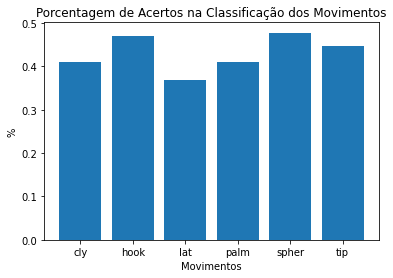

In [ ]:
import matplotlib.pyplot as plt

grupos = ['cly', 'hook', 'lat', 'palm', 'spher', 'tip']
plt.bar(grupos, qualidade)
plt.xlabel('Movimentos')
plt.ylabel('%')
plt.title('Porcentagem de Acertos na Classificação dos Movimentos')
plt.show()

In [ ]:
desvio = np.std(qualidade)
desvio

0.03798149645466208

In [ ]:
df_cm = pd.DataFrame(cm, range(6),range(6))

In [ ]:
pip install pretty_confusion_matrix

     |████████████████████████████████| 11.3 MB 13.9 MB/s 
     |████████████████████████████████| 15.7 MB 64.0 MB/s 
     |████████████████████████████████| 156 kB 61.6 MB/s 
     |████████████████████████████████| 103 kB 60.0 MB/s 
     |████████████████████████████████| 191 kB 55.0 MB/s 
     |████████████████████████████████| 11.2 MB 54.4 MB/s 
     |████████████████████████████████| 73 kB 1.4 MB/s 
     |████████████████████████████████| 843 kB 72.6 MB/s 
     |████████████████████████████████| 41 kB 644 kB/s 
     |████████████████████████████████| 68 kB 6.8 MB/s 
     |████████████████████████████████| 890 kB 77.2 MB/s 
     |████████████████████████████████| 596 kB 64.5 MB/s 
     |████████████████████████████████| 6.5 MB 63.4 MB/s 
     |████████████████████████████████| 98 kB 8.2 MB/s 
     |████████████████████████████████| 461 kB 82.7 MB/s 
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstall

/usr/local/lib/python3.7/dist-packages/pretty_confusion_matrix/pretty_confusion_matrix.py:200: MatplotlibDeprecationWarning: 
The tick1On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick1line.set_visible instead.
  t.tick1On = False
/usr/local/lib/python3.7/dist-packages/pretty_confusion_matrix/pretty_confusion_matrix.py:201: MatplotlibDeprecationWarning: 
The tick2On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick2line.set_visible instead.
  t.tick2On = False
/usr/local/lib/python3.7/dist-packages/pretty_confusion_matrix/pretty_confusion_matrix.py:203: MatplotlibDeprecationWarning: 
The tick1On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick1line.set_visible instead.
  t.tick1On = False
/usr/local/lib/python3.7/dist-packages/pretty_confusion_matrix/pretty_confusion_matrix.py:204: MatplotlibDeprecationWarning: 
The tick2On function was deprecated in Matplotlib 3.1 and will be remo

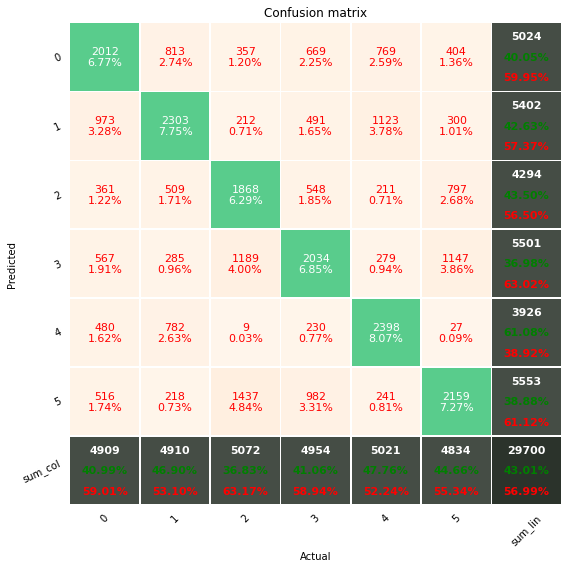

In [ ]:
import numpy as np
from pretty_confusion_matrix import pp_matrix

pp_matrix(df_cm)